In [1]:
# Import and load

import keras
keras.__version__

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint

import os

from sklearn.metrics import roc_auc_score 

import matplotlib.pyplot as plt 
%matplotlib inline

from matplotlib2tikz import save as tikz_save

# output directory name:
output_dir1 = 'model_output/rnn1'
output_dir2 = 'model_output/rnn2'
output_dir3 = 'model_output/rnn3'
output_dir4 = 'model_output/rnn4'

n_unique_words = 10000 
max_review_length = 500

print('Loading data...')
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip
pad_type = trunc_type = 'pre'
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

print(len(x_train), 'training sequences')
print(len(x_valid), 'validation sequences')
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)



Using TensorFlow backend.


Loading data...
(25000, 'training sequences')
(25000, 'validation sequences')
('x_train shape:', (25000, 500))
('x_valid shape:', (25000, 500))


In [2]:
# training:
epochs = 5
batch_size = 128

# vector-space embedding: 
n_dim = 32

# RNN layer architecture:
n_rnn = 32 
drop_rnn = 0.2

model1 = Sequential()
model1.add(layers.Embedding(n_unique_words, n_dim))
model1.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model1.add(layers.Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(layers.Embedding(n_unique_words, n_dim))
model2.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model2.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model2.add(layers.Dense(1, activation='sigmoid'))

model3 = Sequential()
model3.add(layers.Embedding(n_unique_words, n_dim))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model3.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model3.add(layers.Dense(1, activation='sigmoid'))

model4 = Sequential()
model4.add(layers.Embedding(n_unique_words, n_dim))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn, return_sequences=True))
model4.add(layers.SimpleRNN(n_rnn, dropout=drop_rnn))
model4.add(layers.Dense(1, activation='sigmoid'))

models = [model1, model2, model3, model4]
outdirs = [output_dir1, output_dir2, output_dir3, output_dir4]

In [3]:
def train_model(model, output_dir):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])
    return history

hists = []
for k in range(len(models)):
    hists.append(train_model(models[k], outdirs[k]))
    print('Training model {} complete'.format(k))
    

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6501 - acc: 0.6059 - val_loss: 0.5151 - val_acc: 0.7626
Epoch 2/5
25000/25000 [==============================] - 35s 1ms/step - loss: 0.4835 - acc: 0.7758 - val_loss: 0.4836 - val_acc: 0.7732
Epoch 3/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.3234 - acc: 0.8657 - val_loss: 0.3706 - val_acc: 0.8424
Epoch 4/5
25000/25000 [==============================] - 52s 2ms/step - loss: 0.2251 - acc: 0.9130 - val_loss: 0.3922 - val_acc: 0.8284
Epoch 5/5
25000/25000 [==============================] - 57s 2ms/step - loss: 0.1635 - acc: 0.9400 - val_loss: 0.3951 - val_acc: 0.8520
Training model 0 complete
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 104s 4ms/step - loss: 0.6469 - acc: 0.5872 - val_loss: 0.4235 - val_acc: 0.8160
Epoch 2/5
25000/25000 [==============================] - 

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label tex

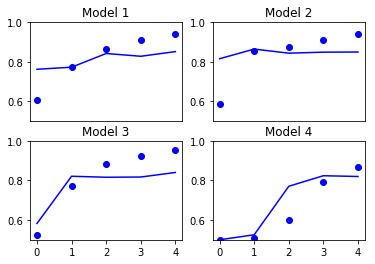

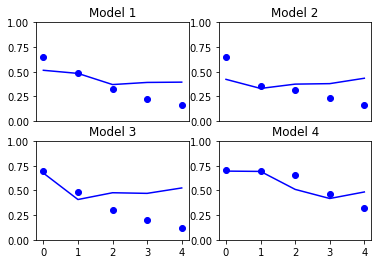

In [20]:
fig1 = plt.figure(1)
plt.clf()
fig2 = plt.figure(2)
plt.clf()

for k in range(len(models)):
    
    history = hists[k]

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.figure(1)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.ylim([0.5, 1])
    #plt.title('Training and validation accuracy')
    if k < 2:
        plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend()

    plt.figure(2)
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    #plt.title('Training and validation loss')
    plt.ylim([0, 1])
    if k < 2:
        plt.gca().axes.get_xaxis().set_visible(False)
    #plt.legend()
    
    
tikz_save("../beamer/graphics/RNN_acc.tex", 
            figureheight='\\figureheight',
            figurewidth='\\figurewidth',
            figure=fig1)
tikz_save("../beamer/graphics/RNN_loss.tex",
            figureheight='\\figureheight',
            figurewidth='\\figurewidth',
            figure=fig2)
plt.show()



In [14]:
fig1.gca()

In [9]:

y_hats = []
points = ['2', '2', '1', '1']
for k in range(len(models)):
    models[k].load_weights(outdirs[k]+"/weights.0"+points[k]+".hdf5") # zero-indexed
    y_hats.append(models[k].predict_proba(x_valid))
    print("Model {}: {:0.2f}".format(k+1, roc_auc_score(y_valid, y_hats[k])*100.0))
    

Model 1: 86.34
Model 2: 93.49
Model 3: 66.09
Model 4: 52.38


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label tex

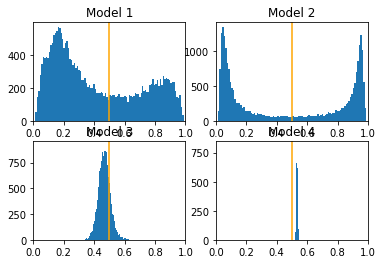

In [11]:
fig3 = plt.figure(3)
plt.clf()
for k in range(len(models)):
    plt.subplot(2, 2, k+1)
    plt.title('Model {}'.format(k+1))
    plt.hist(y_hats[k], bins=100)
    _ = plt.axvline(x=0.5, color='orange')
    plt.xlim([0, 1])
    
tikz_save("../beamer/graphics/RNN_hists.tex", 
            figureheight='\\figureheight',
            figurewidth='\\figurewidth',
            figure=fig3)
